<a href="https://colab.research.google.com/github/albaMCh/Visualizacion_Datos/blob/main/Impacto_Covid_Espa%C3%B1a.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## **Introducción**

En este proyecto se va a realizar un análisis de datos sencillo de las hospitalizaciones de UCI en España producidas por el Covid 19.

##**Etapas del Análisis de Datos**

1. Importar módulos de Python
2. Obtención de datos
3. Gestión de Datos (Data Wrangling)
4. Análisis exploratorio de datos (EDA) y visualización
5. Conclusiones



## **1. Importar los módulos de Python**

En este proyecto trabajaremos principalmente con tres módulos de Python que ya conocemos:

* Pandas
* matplotlib, concretamente con el paquete pyplot
* Numpy

In [ ]:
#Importa los módulos y paquetes necesarios
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

## **2. Obtención de datos**

Para realizar un análisis de datos es necesario obtener dichos datos, siendo a veces el mayor problema. En este caso, el instituto Carlos III ya ha realizado una gran labor obteniendo dichos datos, que puedes [ver y descargar aquí ](https://drive.google.com/file/d/1kbnilQHl3cT8BliwvVRshyP2dicM2Ugy/view?usp=sharing) en formato CSV. 

Añade el archivo csv al colab (esto puede tardar unos minutos) y crea el dataframe df con los datos que contiene.

Visualiza las primeras 5 filas para ver la estructura del dataframe.

In [ ]:
df = pd.read_csv('/content/casos_covid.csv')
df.head(5)


,provincia_iso,sexo,grupo_edad,fecha,num_casos,num_hosp,num_uci,num_def
0,A,H,0-9,2020-01-01,0,0,0,0
1,A,H,10-19,2020-01-01,0,0,0,0
2,A,H,20-29,2020-01-01,0,0,0,0
3,A,H,30-39,2020-01-01,0,0,0,0
4,A,H,40-49,2020-01-01,0,0,0,0


##**3. Gestión de Datos (Data Wrangling)**

En esta etapa, los datos se ven modificados para que sea más fácil realizar un posterior análisis y visualización. Las modificaciones más comunes que pueden sufrir los datos son limpieza, transformación, combinación y redimensionado.

Antes de realizar cualquier tipo de modificación de los datos, es recomendable analizar sus columnas, valores nulos, número de filas, tipos de datos, etc.


In [ ]:
# Columnas del DataFrame
df.columns

Index(['provincia_iso', 'sexo', 'grupo_edad', 'fecha', 'num_casos', 'num_hosp',
       'num_uci', 'num_def'],
      dtype='object')

In [ ]:
# Número de filas y columnas
df.shape

(1367400, 8)

Comprueba qué tipo de datos contiene cada columna, y si contiene valores nulos.

In [ ]:
# Tipo de datos por columna
df.dtypes

provincia_iso    object
sexo             object
grupo_edad       object
fecha            object
num_casos         int64
num_hosp          int64
num_uci           int64
num_def           int64
dtype: object

In [ ]:
# Columnas con valores nulos
df.isnull().sum()

provincia_iso    25800
sexo                 0
grupo_edad           0
fecha                0
num_casos            0
num_hosp             0
num_uci              0
num_def              0
dtype: int64

Crea una lista con los valores únicos de la columna 'provincia_iso'. Estos valores se refieren a las iniciales de las provincias.

In [ ]:
# Valores únicos de la primera columna
df['provincia_iso'].unique()


array(['A', 'AB', 'AL', 'AV', 'B', 'BA', 'BI', 'BU', 'C', 'CA', 'CC',
       'CE', 'CO', 'CR', 'CS', 'CU', 'GC', 'GI', 'GR', 'GU', 'H', 'HU',
       'J', 'L', 'LE', 'LO', 'LU', 'M', 'MA', 'ML', 'MU', nan, 'NC', 'O',
       'OR', 'P', 'PM', 'PO', 'S', 'SA', 'SE', 'SG', 'SO', 'SS', 'T',
       'TE', 'TF', 'TO', 'V', 'VA', 'VI', 'Z', 'ZA'], dtype=object)

Haz lo mismo para el género.

In [ ]:
# Valores únicos de la segunda columna
df['sexo'].unique()

array(['H', 'M', 'NC'], dtype=object)

Y para el grupo de edad.

In [ ]:
# Valores únicos de la segunda columna
df['grupo_edad'].unique()

array(['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69',
       '70-79', '80+', 'NC'], dtype=object)

¿De cuantos días contiene datos el dataset? 

In [ ]:
# Valores únicos de la segunda columna
df['fecha'].nunique()

860

En cuanto al resto de columnas, no tiene sentido analizarlas de esta forma, pues son valores dados de ingresos, UCIs, muertes y contagios para cada grupo de provincia,sexo, fecha y edad.

Tras analizar los datos, se concluye que no es necesaria realizar ninguna transformación. Esto es debido a que no hay que limpiar, rellenar o imputar datos porque no hay datos vacíos ni nulos ni duplicados en ninguna de las columnas. En caso de que existieran, podrían interferir en el análisis y habría que tener diferentes estrategias según la cantidad y el tipo de datos.

##**4. Análisis Exploratorio de Datos (EDA) y Visualización**

Una vez se ha analizado la estructura de los datos y se ha decidido cómo gestionarlos, el siguiente paso a realizar y el más emocinante es un análisis exploratorio de datos. Antes de realizar esto, es conveniente hacerse algunas preguntas. Algunas preguntas concretas para este caso, partiendo de los datos podrían ser:
* ¿Hay diferencias en los contagios/UCI/muertes entre edad?
* ¿Hay diferencias en los contagios/UCI/muertes entre sexo?
* ¿Hay diferencias en los contagios/UCI/muertes entre provincias?
* ¿Quién tiene más probabilidad de acabar en UCI por género? Y por edad?

Una vez aclarado qué queremos obtener, procedemos a realizar el análisis de datos.

**Evolución de la pandemia**

En este caso, queremos mostrar en una línea temporal, el número de Contagios, Hospitalizaciones, Ingresos UCI y Defunciones totales, es decir la suma de cada provincia, para cada fecha.

Muestra las 4 gráficas en un mismo área unas encima de otras, con un tamaño de gráfico de 10x14.

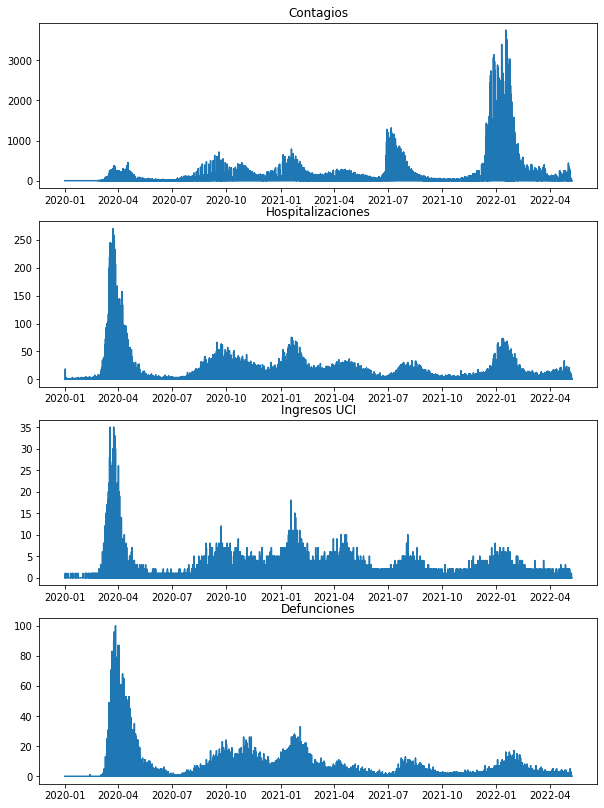

In [ ]:
import datetime as dt

# gráfico multilínea con formato de fecha
fig, ax = plt.subplots(4,1,figsize=(10, 14))

ax[0].plot(pd.to_datetime(df['fecha']), df['num_casos'])
ax[0].title.set_text('Contagios')

ax[1].plot(pd.to_datetime(df['fecha']), df['num_hosp'])
ax[1].title.set_text('Hospitalizaciones')

ax[2].plot(pd.to_datetime(df['fecha']), df['num_uci'])
ax[2].title.set_text('Ingresos UCI')

ax[3].plot(pd.to_datetime(df['fecha']), df['num_def'])
ax[3].title.set_text('Defunciones')
 
plt.show()






#Pregunta 1

¿En qué peridodo se produjeron menos contagios?

a) Invierno 2020-2021

b) Primavera 2020

c) Verano 2020

d) Otoño 2020

Almacena la letra de la respuesta correcta en la variable solucion_1.

¿El resto de gráficas muestran la misma tendencia? Responde con un booleano en la variable solucion_1b 

In [ ]:
solucion_1= 'c'

solucion_1b=True

**Comparación de la evolución de la pandemia en Barcelona y Madrid**

Vuelve a realizar las gráficas de lineas temporales para los contagios, hospitalizaciones, ingresos UCI y defunciones, pero esta vez representa en cada uno, superpuestos los datos de Barcelona y Madrid. Utiliza el parámetro alpha al 0.5.

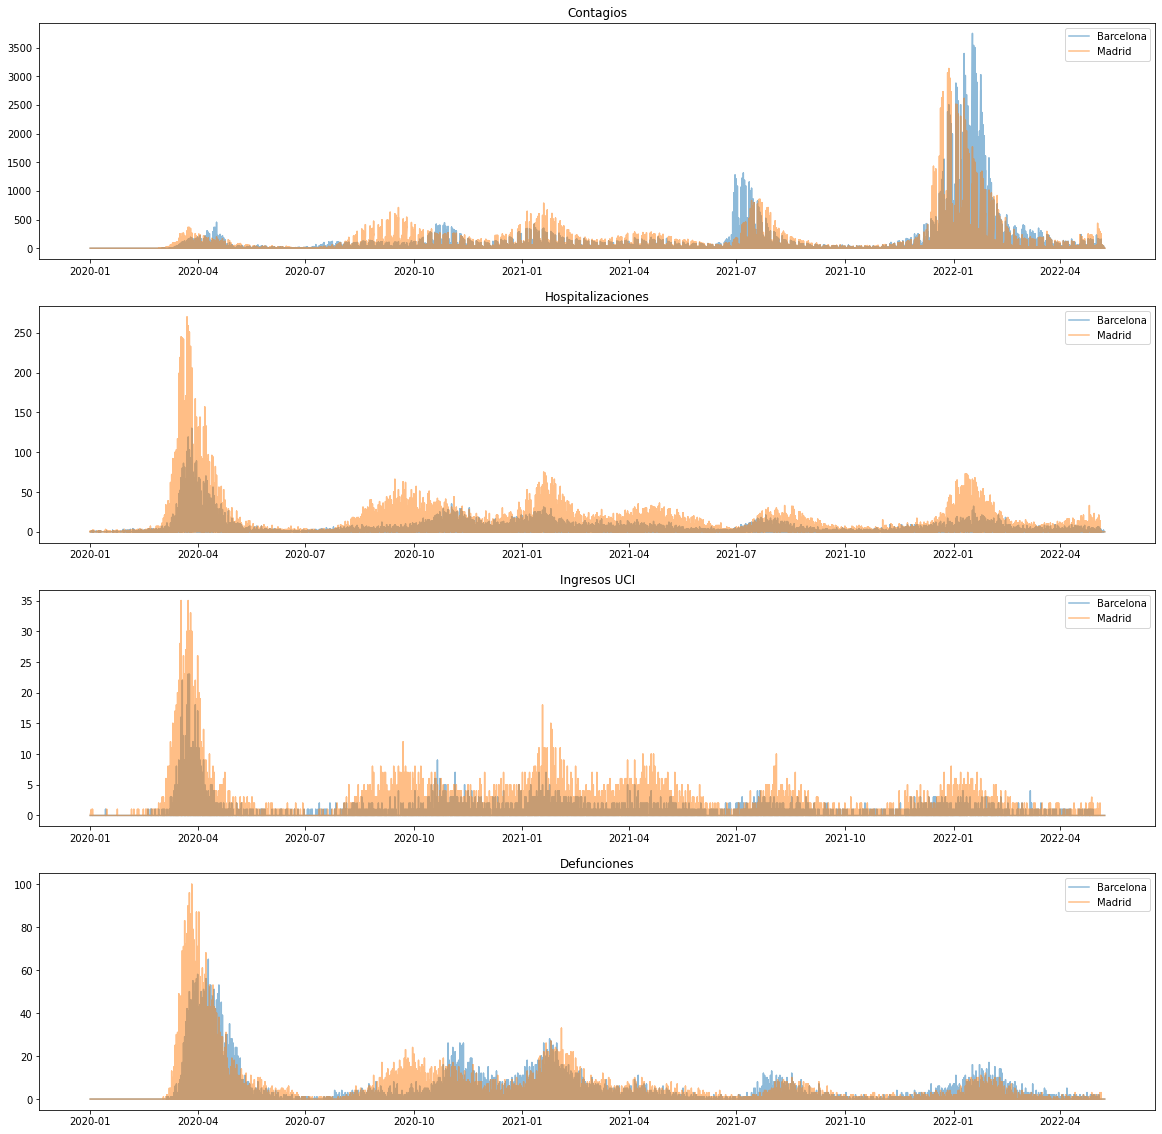

In [ ]:
ig, ax = plt.subplots(4,1,figsize=(20, 20))


df_B = df[df['provincia_iso']=='B']
df_M = df[df['provincia_iso']=='M']

ax[0].plot(pd.to_datetime(df_B['fecha']), df_B['num_casos'],label='Barcelona',alpha=0.5)
ax[0].plot(pd.to_datetime(df_M['fecha']), df_M['num_casos'], label='Madrid',alpha=0.5)
ax[0].title.set_text('Contagios')
ax[0].legend()

ax[1].plot(pd.to_datetime(df_B['fecha']), df_B['num_hosp'], label='Barcelona',alpha=0.5)
ax[1].plot(pd.to_datetime(df_M['fecha']), df_M['num_hosp'], label='Madrid',alpha=0.5)
ax[1].title.set_text('Hospitalizaciones')
ax[1].legend()

ax[2].plot(pd.to_datetime(df_B['fecha']), df_B['num_uci'], label='Barcelona',alpha=0.5)
ax[2].plot(pd.to_datetime(df_M['fecha']), df_M['num_uci'], label='Madrid',alpha=0.5)
ax[2].title.set_text('Ingresos UCI')
ax[2].legend()

ax[3].plot(pd.to_datetime(df_B['fecha']), df_B['num_def'], label='Barcelona',alpha=0.5)
ax[3].plot(pd.to_datetime(df_M['fecha']), df_M['num_def'], label='Madrid',alpha=0.5)
ax[3].title.set_text('Defunciones')
ax[3].legend()

plt.show()


Responde con 'Barcelona' o 'Madrid' en la variable solucion_2 cual ha sido la ciudad con mayor pico de hospitalizaciones por el Covid según las conclusiones sacadas de los gráficos.

Responde, en la variable solucion_2b, con 'Barcelona' o 'Madrid' cual ha tenido el mayor pico de contagios.

In [ ]:
solucion_2='Madrid'

solucion_2b='Barcelona'

**Muertes absolutas por sexo**

Representa con un gráfico de tarta las muertes totales según el género. 

Utiliza como etquetas la lista de valores únicos de la columna 'sexo' y como formato de valor del número dentro del gráfico '%.2f%%'.

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:7: MatplotlibDeprecationWarning: Non-1D inputs to pie() are currently squeeze()d, but this behavior is deprecated since 3.1 and will be removed in 3.3; pass a 1D array instead.
  import sys


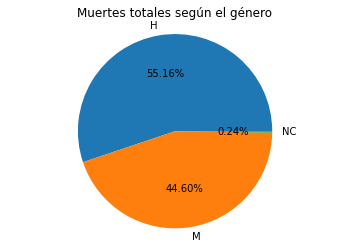

In [ ]:
defunc_por_genero = df.groupby('sexo')['num_def'].agg(['sum'])
etiquetas = df['sexo'].unique()



 
plt.pie(defunc_por_genero, labels=etiquetas, autopct='%.2f%%')
plt.title('Muertes totales según el género')
plt.axis('equal')
plt.show()




Completa la cadena de texto de la variable solucion_3 con los datos visualizados en el gráfico (H,M o NC) y (xx.xx%).

In [ ]:
solucion_3='El género con más defunciones es H con 55.16%' #sustituye las _ por el dato correspondiente

**Provincia más afectada**

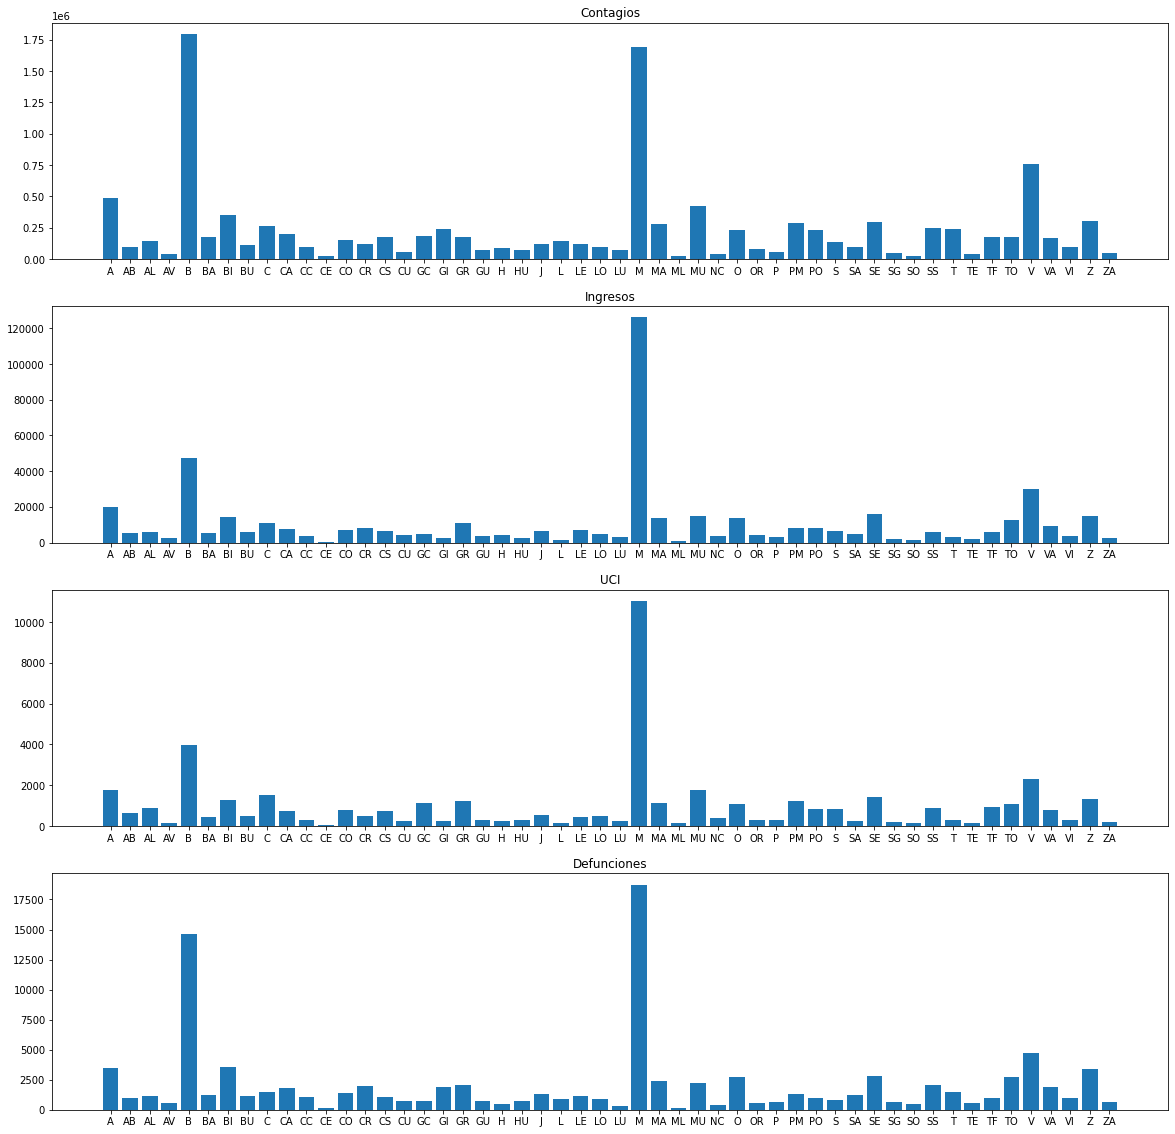

In [ ]:
df_prov = df.groupby(['provincia_iso']).sum()


names = df_prov.index
df_def = df_prov['num_def']
df_casos = df_prov['num_casos']
df_hosp = df_prov['num_hosp']
df_uci = df_prov['num_uci']

fig, axs = plt.subplots(4,1, figsize=(20, 20))

axs[0].bar(names, df_casos)
axs[0].title.set_text('Contagios')
axs[1].bar(names, df_hosp)
axs[1].title.set_text('Ingresos')
axs[2].bar(names, df_uci)
axs[2].title.set_text('UCI')
axs[3].bar(names, df_def)
axs[3].title.set_text('Defunciones')

plt.show()

¿Cuál es la provincia, sin contar Madrid y Barcelona, con más contagios? Almacena en la solucion_3 el valor correspondiente de la columna 'provincia_iso' (Ej. 'M').

In [ ]:
solucion_4='V'

**Grupo de edad más afectado**

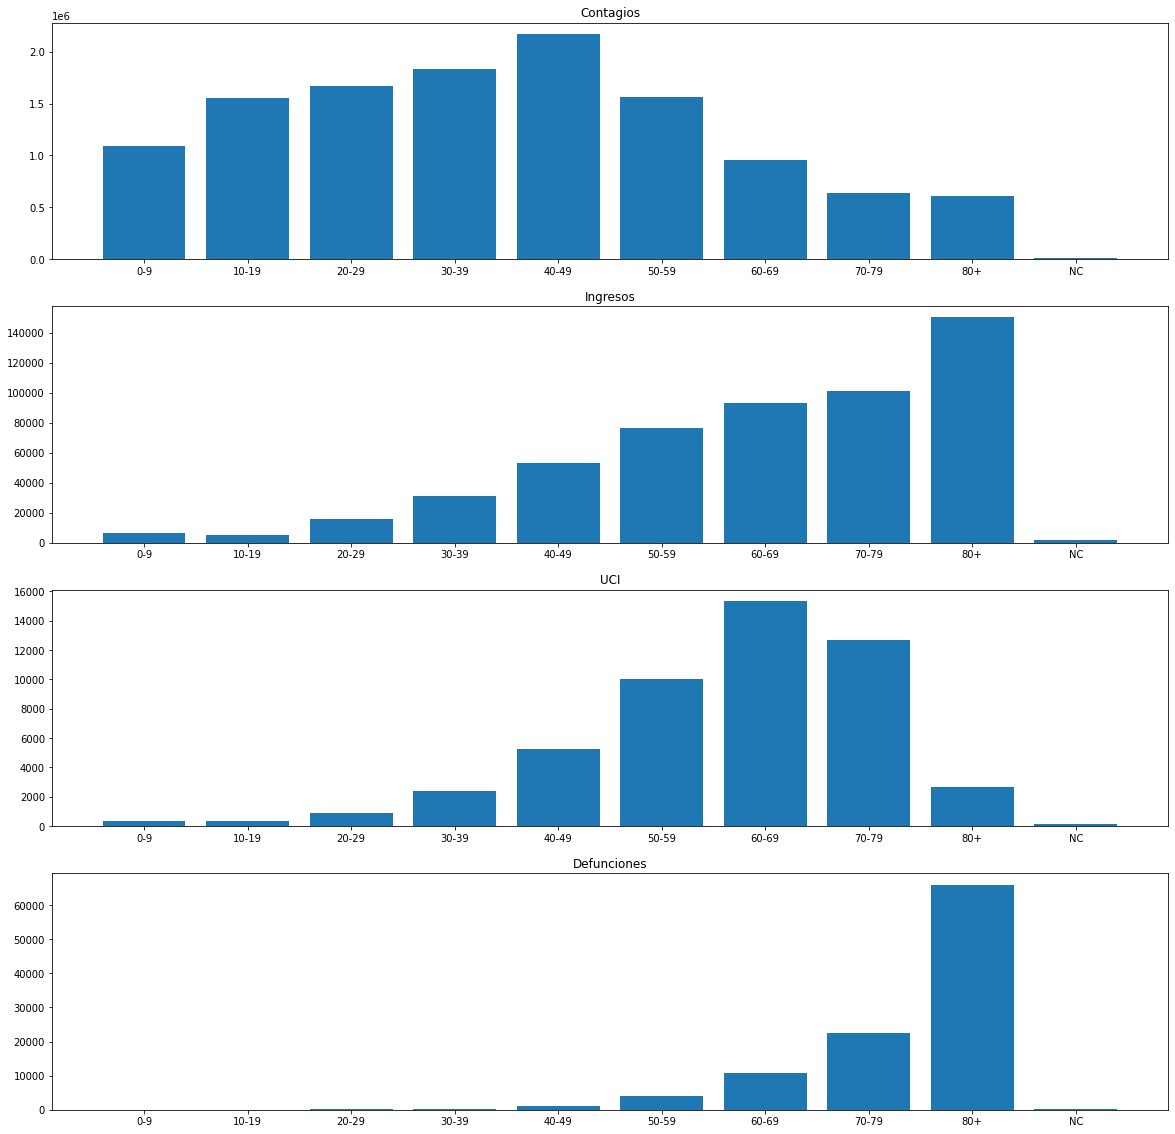

In [ ]:
df_edad = df.groupby(['grupo_edad']).sum()

names = df_edad.index
df_def = df_edad['num_def']
df_casos = df_edad['num_casos']
df_hosp = df_edad['num_hosp']
df_uci = df_edad['num_uci']

fig, axs = plt.subplots(4,1, figsize=(20, 20))
axs[0].bar(names, df_casos)
axs[0].title.set_text('Contagios')
axs[1].bar(names, df_hosp)
axs[1].title.set_text('Ingresos')
axs[2].bar(names, df_uci)
axs[2].title.set_text('UCI')
axs[3].bar(names, df_def)
axs[3].title.set_text('Defunciones')

plt.show()


¿Qué rango de edad sufrió más ingresos UCI? Almacena en la variable solucion_5 el rango de edad como cadena de texto (ej. '0-9')

In [ ]:
solucion_5='60-69'

In [ ]:
#@title Ejecuta para obtener el token
import hashlib

correct = str(solucion_1)+ str(solucion_2)+ str(solucion_2b)+ str(solucion_3)+ str(solucion_4)+ str(solucion_5)
pwd = hashlib.sha256(str(correct).encode())
#print('El token para corregir en Nodd3r es:\n',pwd.hexdigest())

if pwd.hexdigest()[0:6] == '2b9bad':
  print('¡Felicidades! puedes avanzar al siguiente modulo \n El token es: ',pwd.hexdigest())
else:
  print('Hay algún error en el código o tu forma es diferente a la planteada, pregunta por el foro si no lo ves claro.')

¡Felicidades! puedes avanzar al siguiente modulo 
 El token es:  2b9bad03515da79f6a2b727c7f8dd0aadbc860b6fe3b6020830f26a088b0eecf


#Pregunta Bonus

¿Crees que la suma de contagios en Madrid y Barcelona juntos fue mayor que la del resto de provincias de España?

Genera un gráfico con dos barras horizontales acumuladas. Una de ellas con Madrid y Barcelona y la otra con el resto de España (Debe ser diferenciable la aportación de cada provincia a la barra).

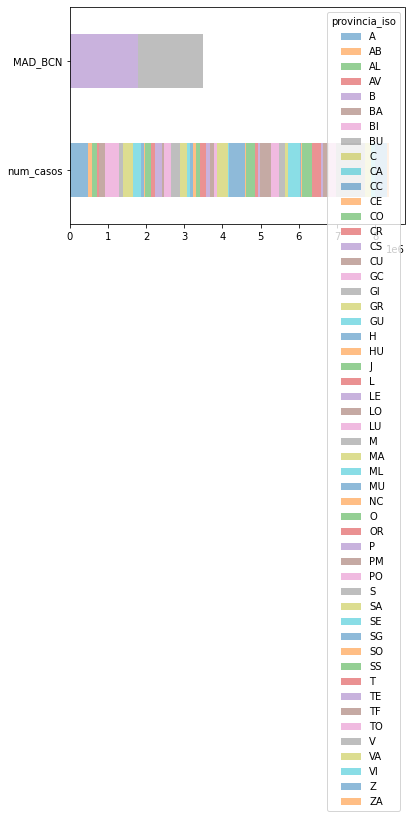

In [ ]:
df_casos_prov = df.groupby(['provincia_iso']).sum().loc[:,['num_casos']]

df_casos_prov.loc['M','MAD_BCN']=df_casos_prov.loc['M','num_casos']
df_casos_prov.loc['B','MAD_BCN']=df_casos_prov.loc['B','num_casos']
df_casos_prov.loc['M','num_casos']=0
df_casos_prov.loc['B','num_casos']=0
df_casos_prov=df_casos_prov.fillna(0)

df_casos_prov.T.plot.barh(stacked=True, alpha=0.5)
plt.show()